Use $10$ puntos equidistantes para encontrar un polinomio interpolante de la función $f(x) = \tanh(x)$ entre $x = -10$ y $x = 10$. Compare el polinomio con la función obtenida. Explique.





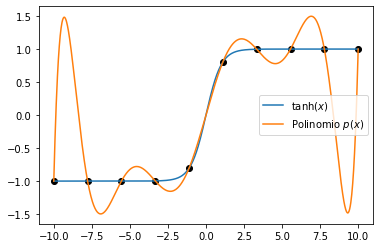

In [118]:
#importamos las librerias que necesitamos, para plotear y para escribir las ecuaciones
import numpy as np
import matplotlib.pyplot as plt

#definimos los polinomios de Lagrange
def lagrange(x, puntos):
    '''
    Interpola una función que pasa por n puntos como un polinomio
    de Lagrange y lo evalúa en el punto x. Los puntos deben ser
    dados como una lista de tuplas (xi, f(xi)).
    '''
    
    Lis = np.ones(len(puntos))
    fs = np.ones(len(puntos))
    for i in range(len(puntos)):
        fs[i] = puntos[i][1]
        for j in range(len(puntos)):
            if j != i:
                Lis[i] *= (x - puntos[j][0])/(puntos[i][0] - puntos[j][0])
    
    return sum(fs*Lis)


# creamos una lista x1 con 10 elementos desde -10 hasta 10
x1 = np.linspace(-10,10,10)
# creamos fx que toma los elementos de x1 y los evalua en tangente hiperbolica y los guarda en la variable fx
fx = np.tanh(x1)
# definimos puntos como una lista de tuplas (x,fx)
puntos = np.array(tuple(zip(x1,fx)))
#comenzamos a graficar y hacemos una lista desde -10 hasta 10 con 1000 puntos
x = np.linspace(-10, 10, 1000)
# ploteamos primero la función tanh(x)
plt.plot(x, np.tanh(x),label='$\\tanh(x)$')
# ploteamos el polinomio de lagrange dado los 10 puntos de puntos(x,fx)
plt.plot(x, [lagrange(xi, puntos) for xi in x], label='Polinomio $p(x)$')
plt.legend()
#ademas agregamos los puntos donde los polinomios de Lagrange coinciden con la función
plt.scatter(puntos[:,0], puntos[:,1], color='black')

# Lo primero que observamos es que el polinomio pasa por los 10 puntos de la función pero tiene oscilaciones muy grandes
# Esto se debe a que son 10 puntos por lo tanto el polinomio es de grado 9. Tener polinomios de grados tan altos no es conveniente por que oscilan
# mucho, en estos casos conviene interpolar por tramos con polinomios que no sean de grado tan grande.
